# Alucar - Analisando as vendas

## 01.03 Análise das Vendas

In [1]:
import pandas as pd

In [2]:
pd.read_csv('data/alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar = pd.read_csv('data/alucar.csv')

In [4]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
print('Quantidade de linhas e colunas: ', alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [6]:
print('Quantidade de dados nulos: ', alucar.isna().sum().sum())

Quantidade de dados nulos:  0


In [7]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [8]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [9]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [10]:
# !pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [11]:
print(sns.__version__)

0.9.0


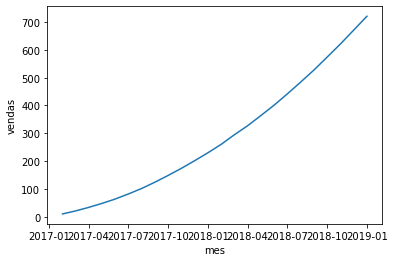

In [12]:
sns.lineplot(x='mes', y='vendas', data=alucar)

## 01.04 Aperfeiçoando o Gráfico

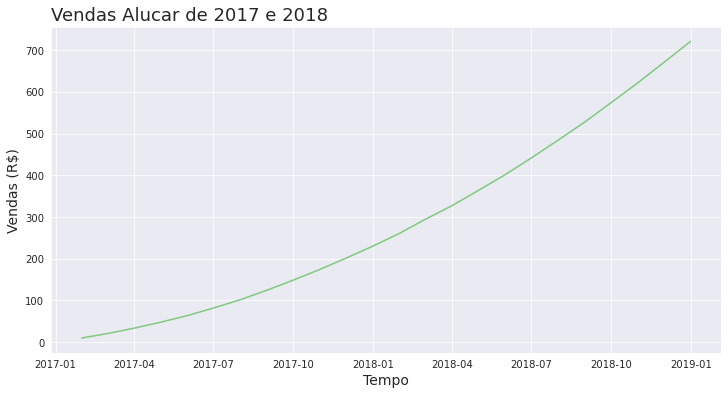

In [13]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax


## 01.06 Para saber mais: Crescimento proporcional entre linhas (time series) utilizando pandas

Quando trabalhamos com sequências de dados que representam pontos no tempo (time series) é muito comum entender o crescimento de um valor em função do tempo. Por exemplo, o preço de um produto ou uma ação que antes era 100 e agora 110 cresceu 110/100 - 1 = 10%, e depois se caiu para 105, caiu 105/110 - 1 = -4%.

Portanto a fórmula geral é valor / valor_anterior - 1. Em python podemos gerar alguns dados aleatórios:

In [14]:
import numpy as np
import pandas as pd

np.random.seed(234)
aleatorios = np.random.randint(low = 950, high = 1050, size=100)
df = pd.DataFrame(aleatorios, columns=["preco"])
df.head()

,preco
0,1022
1,981
2,1018
3,1007
4,1045


Como o valor da linha n+1 vai ser dividido pelo valor da linha n temos algo como:

In [15]:
# linhas na posicao posterior (n+1): df.preco.shift(-1)
# linhas na posicao atual (n): df.preco

df['crescimento'] = df.preco.shift(-1).div(df.preco) - 1
df.head()

,preco,crescimento
0,1022,-0.040117
1,981,0.037717
2,1018,-0.010806
3,1007,0.037736
4,1045,-0.059330


Mas, claro, como toda boa análise básica de time series, o pandas já fornece uma função do gênero para trabalharmos:

In [16]:
df['crescimento_direto'] = df.preco.pct_change()
df.head()

,preco,crescimento,crescimento_direto
0,1022,-0.040117,NaN
1,981,0.037717,-0.040117
2,1018,-0.010806,0.037717
3,1007,0.037736,-0.010806
4,1045,-0.059330,0.037736


In [17]:
df.tail()

,preco,crescimento,crescimento_direto
95,961,-0.010406,-0.001040
96,951,0.084122,-0.010406
97,1031,-0.037827,0.084122
98,992,-0.037298,-0.037827
99,955,NaN,-0.037298


## 02.01 Decompondo as vendas

In [18]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [19]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


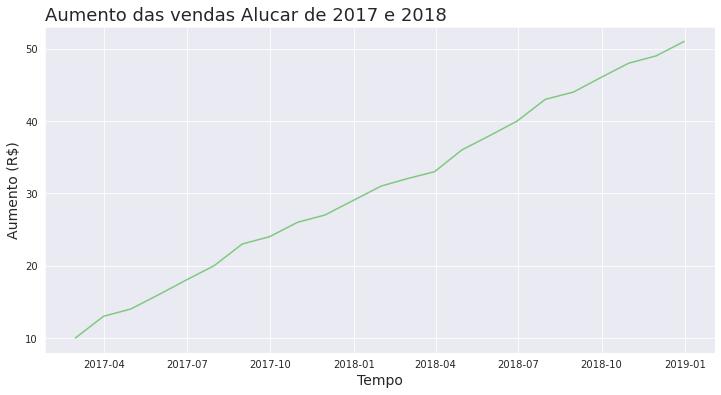

In [20]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento (R$)', fontsize=14)
ax = ax

In [21]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

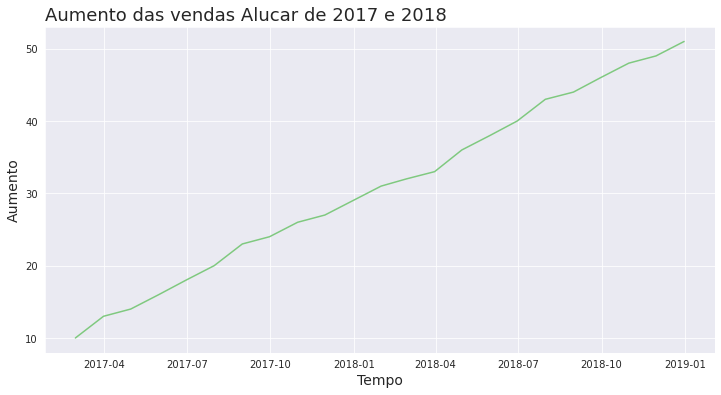

In [22]:
plotar('Aumento das vendas Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [23]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


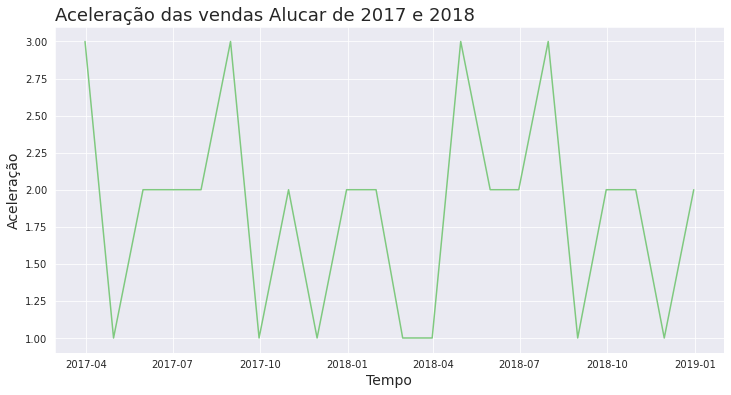

In [24]:
plotar('Aceleração das vendas Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

## 02.02 Observação e tendência

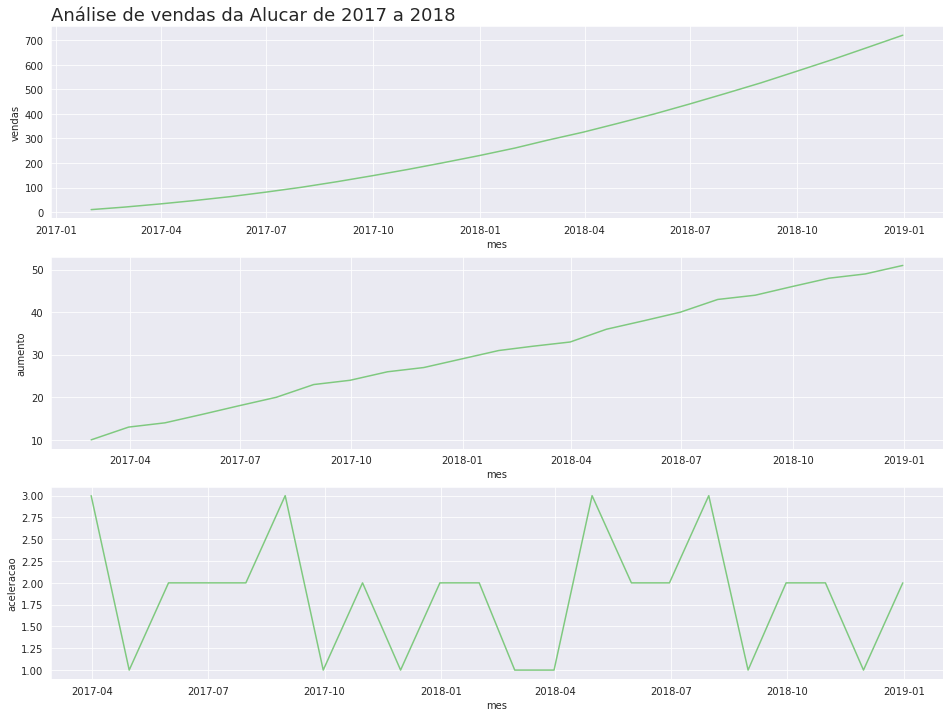

In [25]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de vendas da Alucar de 2017 a 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [26]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

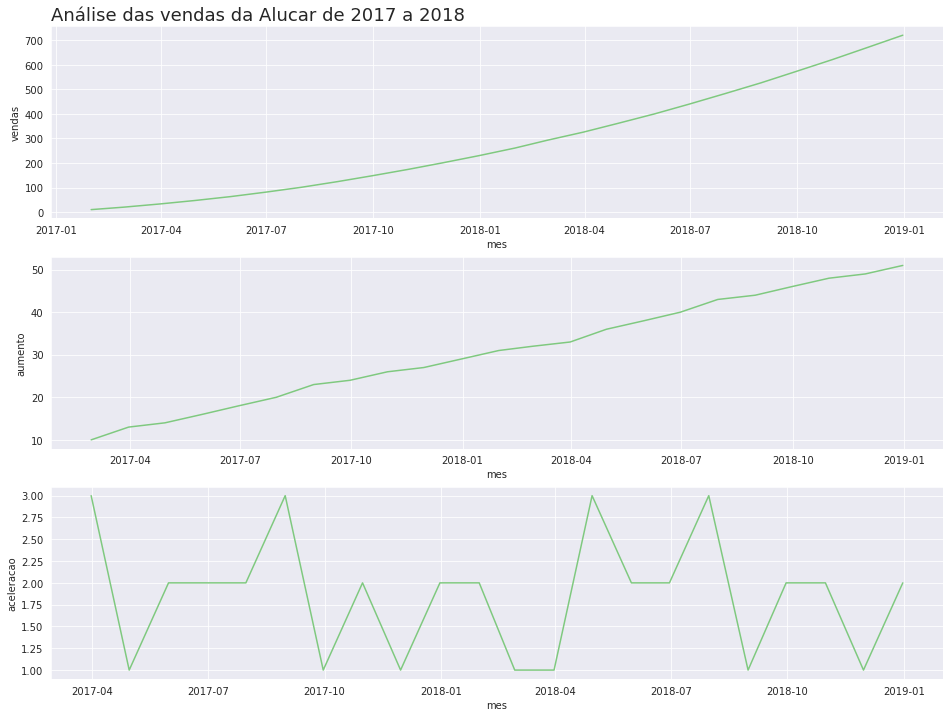

In [27]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise das vendas da Alucar de 2017 a 2018')

## 02.03 Autocorrelação

In [28]:
from pandas.plotting import autocorrelation_plot

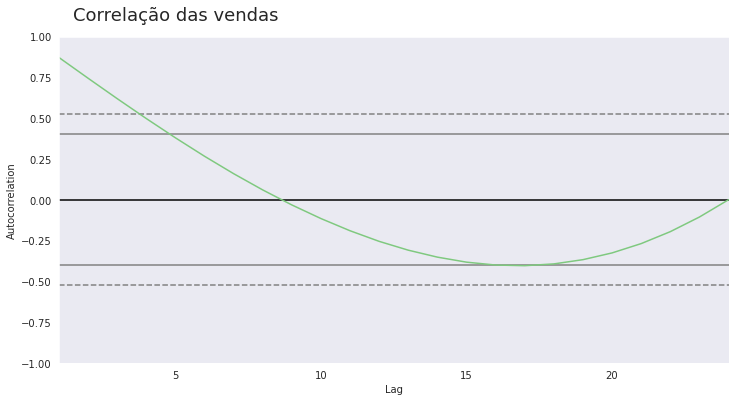

In [29]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

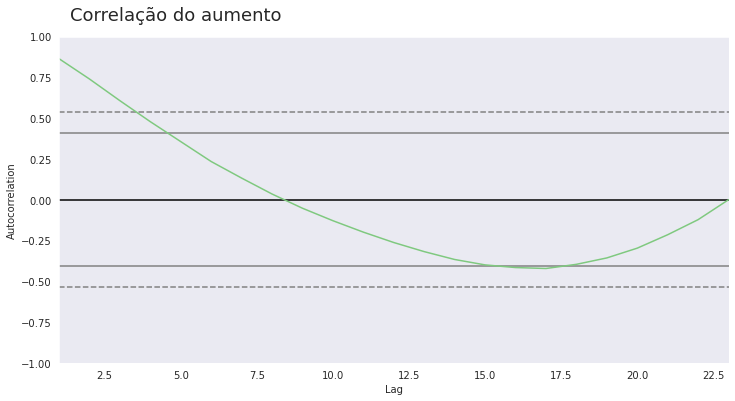

In [30]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

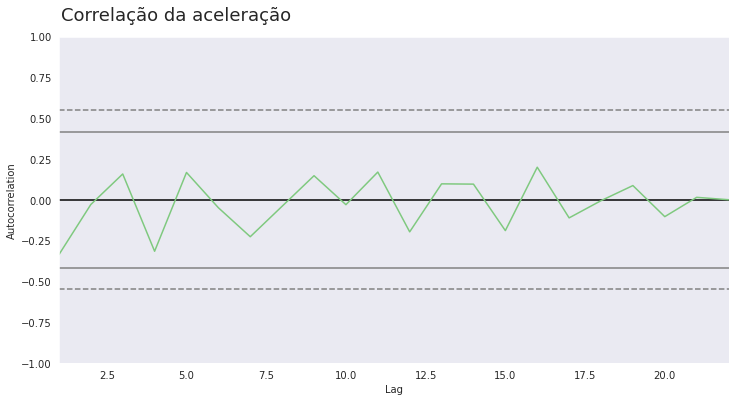

In [31]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

## 03.01 Analisando assinantes

### Alucar - Analisando assinantes da newsletter

In [32]:
assinantes = pd.read_csv('data/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [33]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [34]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [35]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [36]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


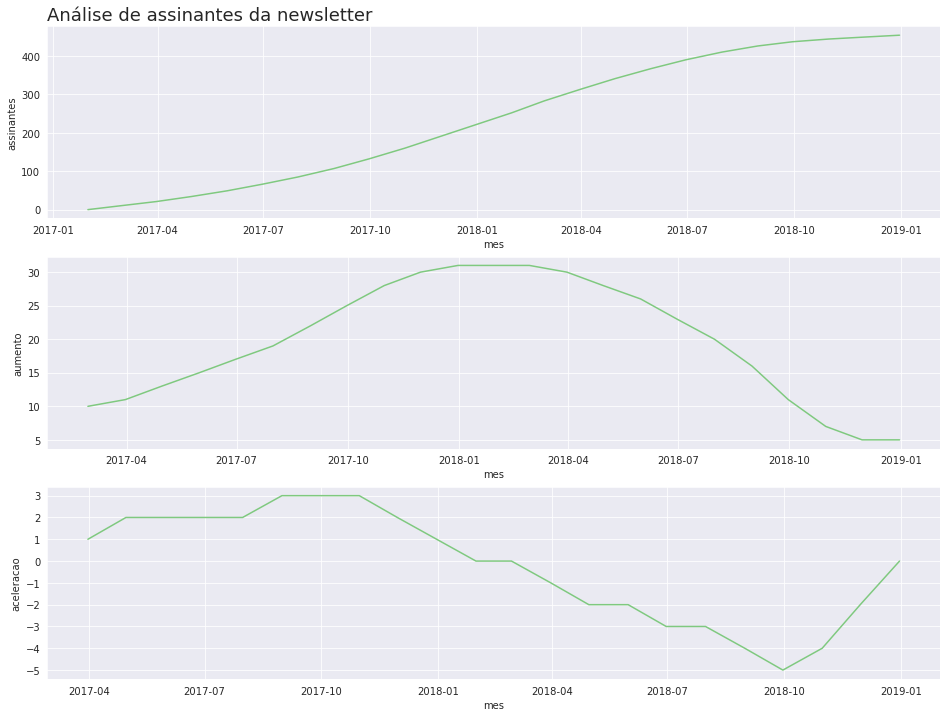

In [37]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

## 03.02 Sazonalidade e chocolate

In [38]:
chocolura = pd. read_csv('data/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [39]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [40]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [41]:
print ('Quantidade de linhas:', chocolura.shape)
print ('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos: 0


In [42]:
chocolura['aumento']= chocolura ['vendas'].diff()
chocolura['aceleracao']= chocolura ['aumento'].diff()

In [43]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


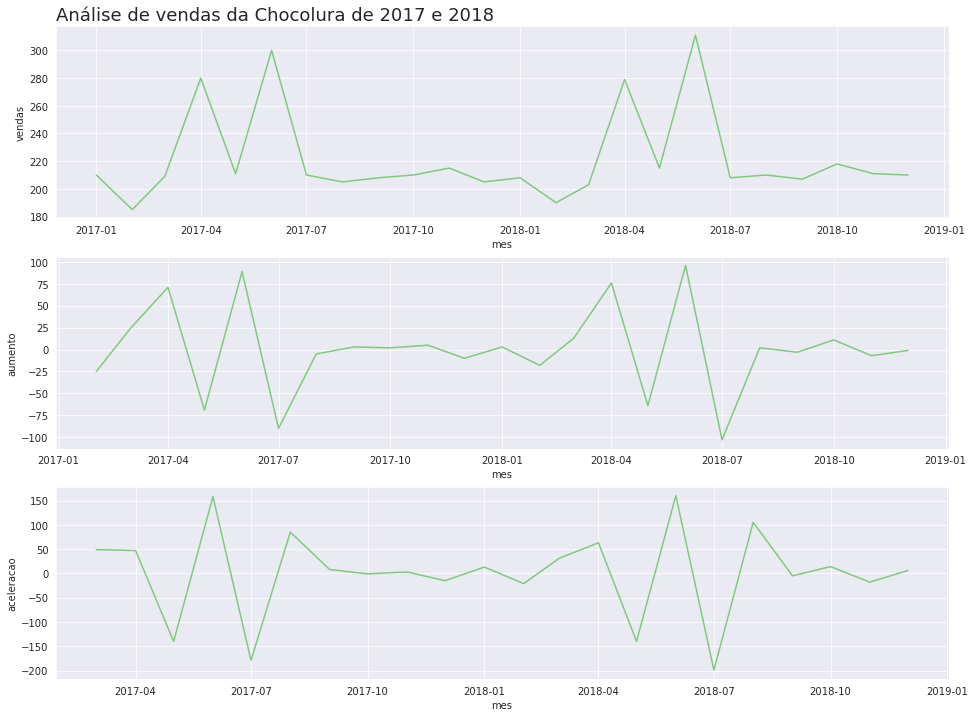

In [44]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da Chocolura de 2017 e 2018')

## 03.03 Investigando a sazonalidade

### Chocolura - Vendas diárias (Outubro e Novembro)

In [45]:
vendas_por_dia = pd.read_csv('data/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [46]:
print ('Quantidade de linhas:',vendas_por_dia.shape)
print ('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidade de linhas: (61, 2)
Quantidade de dados nulos: 0


In [47]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [48]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [49]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [50]:
vendas_por_dia['aumento']= vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao']= vendas_por_dia ['aumento'].diff()

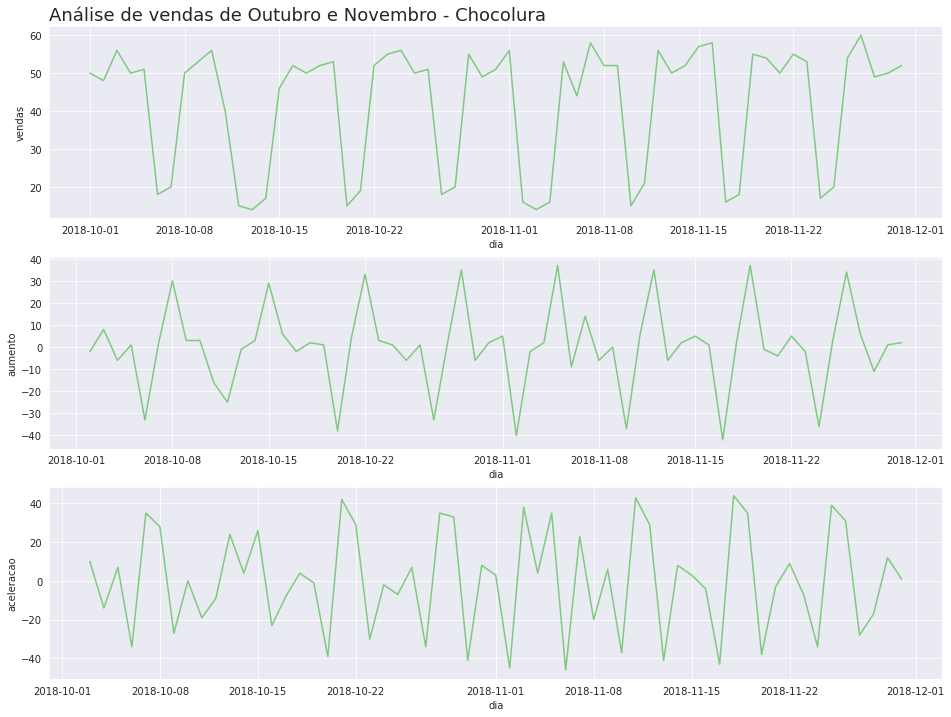

In [51]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

Analisando a sazonalidade

In [69]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

Now, since pandas upgraded, I got this error: AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

I check the document and it seemed this property change to 'day_name' 

Series.dt.day_name is implemented as a method, not an attribute. As such you need to call it with ()

In [70]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [71]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [72]:
dias_traduzidos = {"Monday": "Segunda",
    "Tuesday": "Terca",
    "Wednesday": "Quarta",
    "Thursday": "Quinta",
    "Friday": "Sexta",
    "Saturday": "Sabado",
    "Sunday": "Domingo"}

In [73]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [74]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


**Agrupando os dias**

In [76]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean(). round()
vendas_agrupadas

<ipython-input-76-274cec7648e5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean(). round()


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0
